# **Project: Employee Segmentation**

This is the final project for the **Data Science in Python: Unsupervised Learning** course. This notebook is split into seven sections:
1. Data Prep & EDA
2. K-Means Clustering
3. PCA for Visualization
4. K-Means Clustering (Round 2)
5. PCA for Visualization (Round 2)
6. EDA on Clusters
7. Make Recommendations

## **Goal & Scope**

**GOAL**: Understand the company’s different segments of employees and how to increase employee retention within each segment.

**SCOPE**: Use clustering techniques to segment the employees, a dimensionality reduction technique to visualize the segments, and finally explore the clusters to make recommendations to increase retention.

## **1. Data Preparation & EDA**

In [1]:
import pandas as pd

employee = pd.read_csv('Data/employee_data.csv')
employee.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition
0,1001,41,Female,1,2,Sales,5993,3,4,Yes
1,1002,49,Male,8,2,Research & Development,5130,4,2,No
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes
3,1005,33,Female,3,1,Research & Development,2909,3,3,No
4,1007,27,Male,2,1,Research & Development,3468,3,2,No


In [2]:
## Check shape the data
employee.shape

(1470, 10)

In [3]:
## Check the data types and presence of null values
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         1470 non-null   int64 
 1   Age                1470 non-null   int64 
 2   Gender             1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   JobLevel           1470 non-null   int64 
 5   Department         1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   PerformanceRating  1470 non-null   int64 
 8   JobSatisfaction    1470 non-null   int64 
 9   Attrition          1470 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.0+ KB


In [4]:
employee.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [5]:
## Convert the categorical data to numeric
import numpy as np

department_dummy = pd.get_dummies(employee['Department'],dtype='int')

X = employee.assign(
    Gender = np.where(employee['Gender']=='Male',1,0),
    Attrition = np.where(employee['Attrition']=='No',1,0)
)

X = pd.concat([X,department_dummy],axis=1).drop('Department',axis=1)

In [6]:
X.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Human Resources,Research & Development,Sales
0,1001,41,0,1,2,5993,3,4,0,0,0,1
1,1002,49,1,8,2,5130,4,2,1,0,1,0
2,1004,37,1,2,1,2090,3,3,0,0,1,0
3,1005,33,0,3,1,2909,3,3,1,0,1,0
4,1007,27,1,2,1,3468,3,2,1,0,1,0


In [7]:
X.shape


(1470, 12)

In [8]:
## Create a summary table on attrition
X['Attrition'].describe()

count    1470.000000
mean        0.838776
std         0.367863
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Attrition, dtype: float64

In [9]:
## Calculate Attrition pecentage
X.Attrition.value_counts(normalize=True)

Attrition
1    0.838776
0    0.161224
Name: proportion, dtype: float64

In [10]:
## Drop the Employee ID and Attrition columns
X = X.drop(['EmployeeID','Attrition'],axis=1)

In [11]:
X.shape

(1470, 10)

<Figure size 1000x600 with 0 Axes>

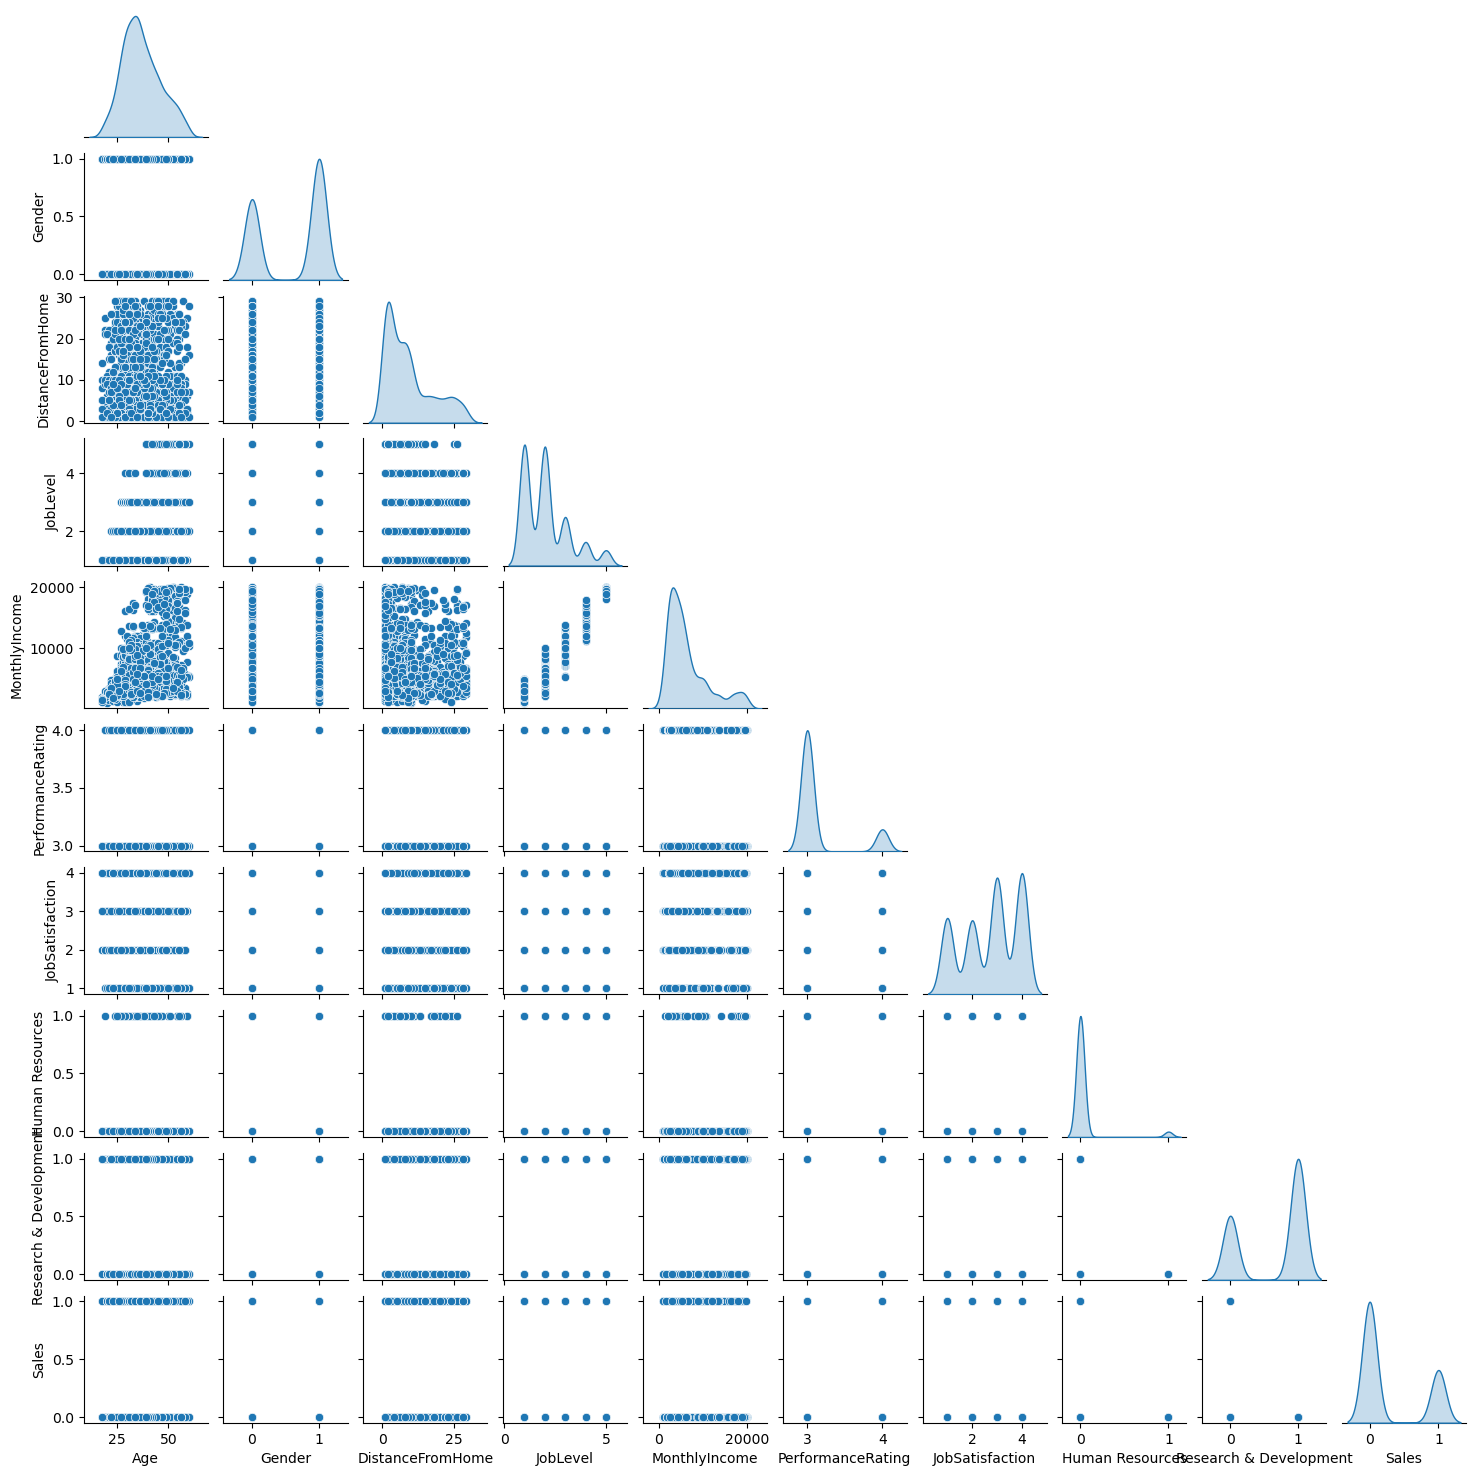

In [12]:
## Create a paiplot with all the columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.pairplot(X,diag_kind='kde',height=1.5,corner=True)
plt.show();

## **2. K-Means Clustering**

In [13]:
## Scale the features
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
X_sd = sd.fit_transform(X)

In [14]:
##Fit the data with K-Means clustering algoithm
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=2, n_init='auto',random_state=42)
KM.fit(X_sd)

KMeans(n_clusters=2, random_state=42)

In [15]:
pd.concat(
    [pd.DataFrame(X_sd, columns=X.columns),
     pd.Series(KM.labels_,name='Cluster')],
     axis=1
)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales,Cluster
0,0.446350,-1.224745,-1.010909,-0.057788,-0.108350,-0.426230,1.153254,-0.211604,-1.374051,1.515244,1
1,1.322365,0.816497,-0.147150,-0.057788,-0.291719,2.346151,-0.660853,-0.211604,0.727775,-0.659960,0
2,0.008343,0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0.246200,-0.211604,0.727775,-0.659960,0
3,-0.429664,-1.224745,-0.764121,-0.961486,-0.763634,-0.426230,0.246200,-0.211604,0.727775,-0.659960,0
4,-1.086676,0.816497,-0.887515,-0.961486,-0.644858,-0.426230,-0.660853,-0.211604,0.727775,-0.659960,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.816497,1.703764,-0.057788,-0.835451,-0.426230,1.153254,-0.211604,0.727775,-0.659960,0
1466,0.227347,0.816497,-0.393938,0.845911,0.741140,-0.426230,-1.567907,-0.211604,0.727775,-0.659960,0
1467,-1.086676,0.816497,-0.640727,-0.057788,-0.076690,2.346151,-0.660853,-0.211604,0.727775,-0.659960,0
1468,1.322365,0.816497,-0.887515,-0.057788,-0.236474,-0.426230,-0.660853,-0.211604,-1.374051,1.515244,1


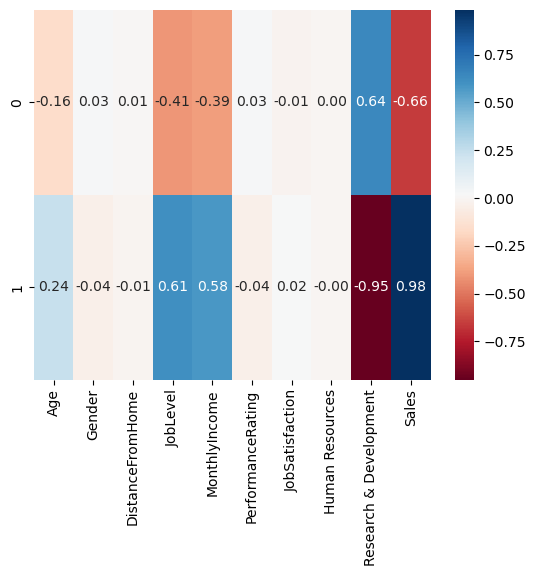

In [16]:
## Plot the cluster cenetrs in an seaborn heatmap
sns.heatmap(
    pd.DataFrame(KM.cluster_centers_, columns=X.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.2f'
)
plt.show();

In [17]:
## Evaluate the model
KM.inertia_

12103.126192324147

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
## Create intertia plot to identify the optimum number of clusters
inertia_value = []
silhouette_values = []

for k in range(2,16):
    Km = KMeans(n_clusters=k, n_init='auto', verbose=0, random_state=42)
    Km.fit(X_sd)
    inertia_value.append(Km.inertia_)
    silhouette_values.append(silhouette_score(X_sd,Km.labels_,metric='euclidean'))
    

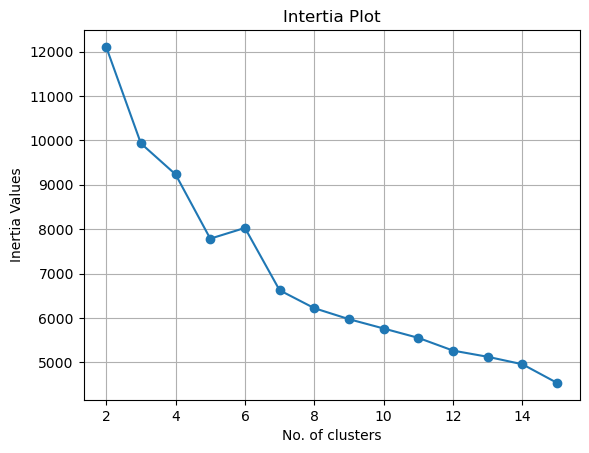

In [21]:
## Plot the inertias against number of clusters

plt.plot(range(2,16),inertia_value,'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia Values')
plt.title('Intertia Plot')
plt.grid()
plt.show();

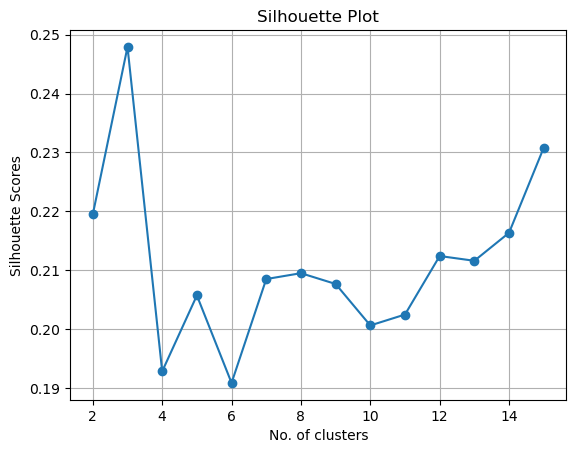

In [22]:
## Plot the silhouette scores against number of clusters

plt.plot(range(2,16),silhouette_values,'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Plot')
plt.grid()
plt.show();

In [23]:
## Fitting the model for 3 clusters
KM3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
KM3.fit(X_sd)

KMeans(n_clusters=3, random_state=42)

In [24]:
KM3.inertia_

9931.840236608225

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sd,KM3.labels_,metric='euclidean')

np.float64(0.24790952940112942)

In [26]:
## Find number of employees in each cluster
emp_cluster = pd.concat(
    [pd.DataFrame(X_sd, columns=X.columns),
     pd.Series(KM3.labels_,name='Cluster')],
     axis=1
)

In [27]:
emp_cluster.Cluster.value_counts().sort_index()

Cluster
0    795
1    405
2    270
Name: count, dtype: int64

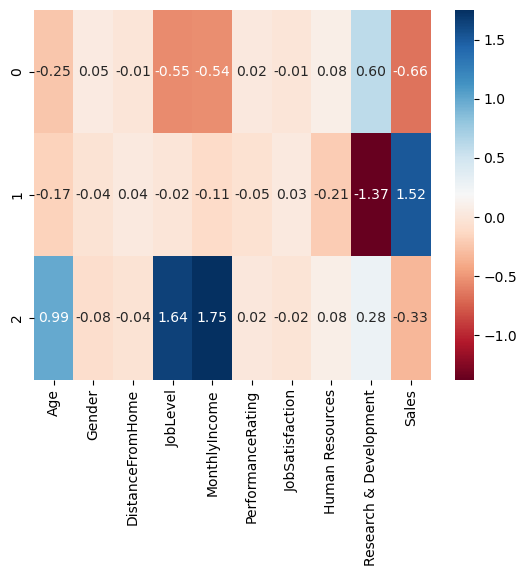

In [28]:
## Create a heatmap for cluster centers

## Plot the cluster cenetrs in an seaborn heatmap
sns.heatmap(
    pd.DataFrame(KM3.cluster_centers_, columns=X.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.2f'
)
plt.show();

In [29]:
## Fit the clusters in original (unscaled) Dataframe


In [30]:
## Find number of employees in each cluster
emp_orig = pd.concat(
    [pd.DataFrame(X, columns=X.columns),
     pd.Series(KM3.labels_,name='Cluster')],
     axis=1
)

In [31]:
emp_orig.groupby('Cluster').agg(
    mean_age=('Age','mean'),
    Gender=('Gender','sum'),
    DF=('DistanceFromHome','mean'),
    JobLevel=('JobLevel','mean'),
    MonthlyIncome=('MonthlyIncome','mean'),
    PerfRating=('PerformanceRating','mean'),
    JobSatis=('JobSatisfaction','mean'),
    HR=('Human Resources','sum'),
    RnD=('Research & Development','sum'),
    Sales=('Sales','sum'),
    Count=('Gender','count')
)

,mean_age,Gender,DF,JobLevel,MonthlyIncome,PerfRating,JobSatis,HR,RnD,Sales,Count
Cluster,,,,,,,,,,,
0,34.672956,495,9.137107,1.455346,3973.402516,3.161006,2.716981,47,748,0,795
1,35.343210,236,9.508642,2.046914,5973.241975,3.135802,2.765432,0,0,405,405
2,45.922222,151,8.881481,3.881481,14745.522222,3.159259,2.707407,16,213,41,270


## Interpret the clusters
- Cluster 1 - Majority R&D, low joblevel
- Cluster 2 - Sales Employees
- Cluster 3 - Majority R&D, High MonthlyIncome

## **3. Fit a PCA model with 2 components**

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit_transform(X_sd)

array([[ 0.76526298, -1.85397261],
       [-0.03168374,  1.28567369],
       [-1.46258775,  0.64556446],
       ...,
       [-0.94526289,  0.81679035],
       [ 0.97696295, -1.65354274],
       [-0.76780157,  0.78158572]], shape=(1470, 2))

In [33]:
pd.DataFrame(pca.components_,columns=X.columns)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,JobSatisfaction,Human Resources,Research & Development,Sales
0,0.432874,-0.048776,-0.002851,0.605093,0.594450,-0.025565,-0.004727,0.029644,-0.213929,0.208338
1,0.213848,0.008409,-0.016533,0.145333,0.177301,0.041532,-0.011404,-0.113744,0.678872,-0.652462


In [34]:
pca.explained_variance_ratio_

array([0.23793893, 0.18883434])

In [35]:
## View the columns
pd.DataFrame(pca.transform(X_sd))

,0,1
0,0.765263,-1.853973
1,-0.031684,1.285674
2,-1.462588,0.645564
3,-1.449531,0.563547
4,-1.758252,0.473654
...,...,...
1465,-0.914088,0.718419
1466,0.730984,1.265253
1467,-0.945263,0.816790
1468,0.976963,-1.653543


In [36]:
## Plot the students with PC1 and PC2
X_transformed = pd.DataFrame(pca.transform(X_sd), columns=['PC1','PC2'])
X_transformed

,PC1,PC2
0,0.765263,-1.853973
1,-0.031684,1.285674
2,-1.462588,0.645564
3,-1.449531,0.563547
4,-1.758252,0.473654
...,...,...
1465,-0.914088,0.718419
1466,0.730984,1.265253
1467,-0.945263,0.816790
1468,0.976963,-1.653543


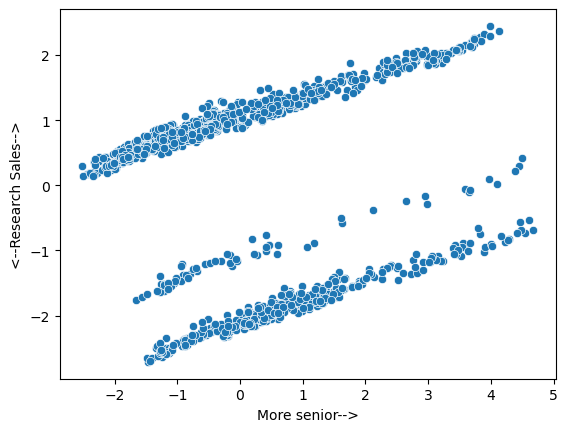

In [37]:
sns.scatterplot(
            X_transformed,
            x='PC1',
            y='PC2',
)
plt.xlabel('More senior-->')
plt.ylabel('<--Research Sales-->')
plt.show();

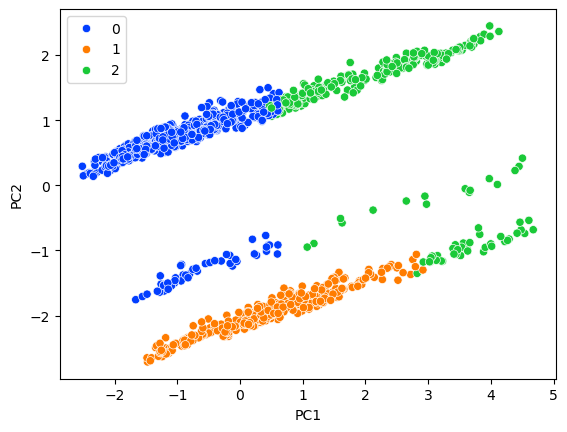

In [38]:
## Overlay the KMeans clusters to visualize
sns.scatterplot(
    data=X_transformed,
    x='PC1',
    y='PC2',
    hue=KM3.labels_,
    palette='bright'
)
plt.show();

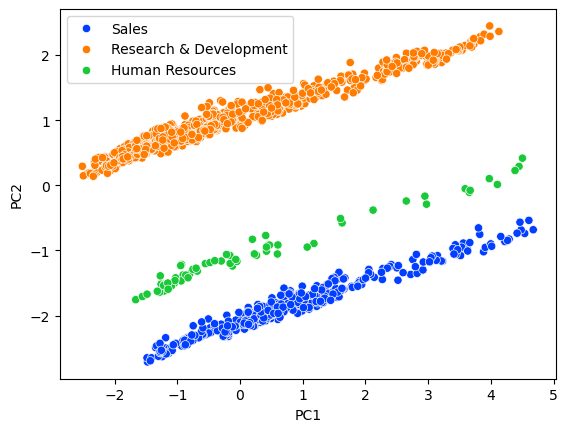

In [39]:
## Overlay the Departments data to visualize
sns.scatterplot(
    data=X_transformed,
    x='PC1',
    y='PC2',
    hue=employee['Department'],
    palette='bright'
)
plt.legend(loc='upper left')
plt.show();


In [40]:
## Fit PCA for all components
pca_all = PCA()
pca_all.fit_transform(X_sd)

array([[ 7.65262982e-01, -1.85397261e+00, -7.22549322e-01, ...,
         6.17117007e-01, -2.36025863e-02,  7.92223621e-16],
       [-3.16837363e-02,  1.28567369e+00,  1.04524383e-01, ...,
         1.17277301e+00,  1.79526078e-01, -2.06977101e-16],
       [-1.46258775e+00,  6.45564458e-01,  3.34399983e-01, ...,
         6.14641175e-01,  1.05727989e-02, -3.73510555e-16],
       ...,
       [-9.45262894e-01,  8.16790353e-01,  6.38033513e-02, ...,
        -9.99023531e-01,  7.58252682e-02, -3.17999403e-16],
       [ 9.76962945e-01, -1.65354274e+00,  1.95815889e-01, ...,
         1.50458361e+00,  6.47550936e-02,  1.01426823e-15],
       [-7.67801575e-01,  7.81585717e-01,  1.81896343e-01, ...,
        -1.41487899e-01,  3.03659066e-01, -3.17999403e-16]],
      shape=(1470, 10))

In [41]:
pd.DataFrame(pca_all.components_**2,columns=X.columns).sum(axis=1)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

In [42]:
pca_all.explained_variance_ratio_

array([2.37938934e-01, 1.88834339e-01, 1.10318300e-01, 1.03591015e-01,
       1.01920222e-01, 9.76922603e-02, 9.42029137e-02, 6.07109079e-02,
       4.79110796e-03, 1.66419841e-16])

In [43]:
pca_all.explained_variance_

array([2.38100907e+00, 1.88962885e+00, 1.10393398e+00, 1.03661533e+00,
       1.01989603e+00, 9.77587629e-01, 9.42670409e-01, 6.07522359e-01,
       4.79436944e-02, 1.66533129e-15])

## **4. K-Means Clustering (Round-2)**

In [44]:
## Refit the K-Means model by dropping the department feature
X_v2 = X.iloc[:,:6]

In [45]:
X_v2.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating
0,41,0,1,2,5993,3
1,49,1,8,2,5130,4
2,37,1,2,1,2090,3
3,33,0,3,1,2909,3
4,27,1,2,1,3468,3


In [46]:
## Scale the features of the new dataset
sd_v2 = StandardScaler()
X_sd_v2 = sd_v2.fit_transform(X_v2)

In [47]:
## Fit the K-Means model on the standardized data



In [48]:
## Create intertia plot to identify the optimum number of clusters
inertia_value = []
silhouette_values = []

for k in range(2,16):
    Km = KMeans(n_clusters=k, n_init='auto', verbose=0, random_state=42)
    Km.fit(X_sd_v2)
    inertia_value.append(Km.inertia_)
    silhouette_values.append(silhouette_score(X_sd_v2,Km.labels_,metric='euclidean'))

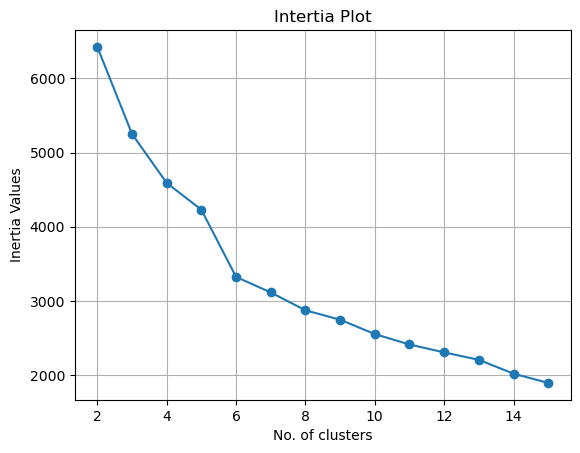

In [49]:
## Plot the inertias against number of clusters

plt.plot(range(2,16),inertia_value,'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia Values')
plt.title('Intertia Plot')
plt.grid()
plt.show();

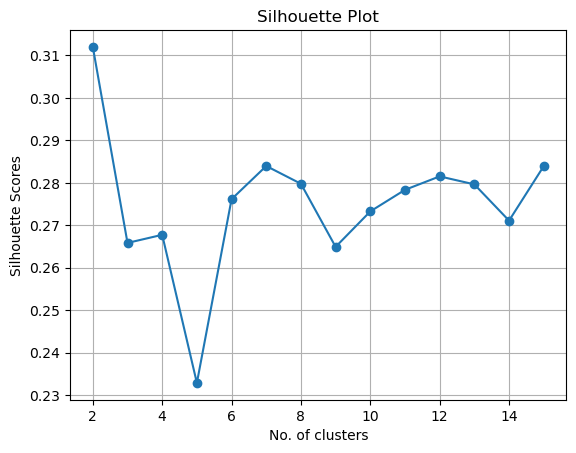

In [50]:
## Plot the silhouette scores against number of clusters

plt.plot(range(2,16),silhouette_values,'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Plot')
plt.grid()
plt.show();

In [51]:
## Fit the KMeans with 6 clusters
KM6_v2 = KMeans(n_clusters=6, random_state=42, n_init='auto')
KM6_v2.fit_transform(X_sd_v2)

array([[2.52522022, 2.18779649, 3.28371237, 3.12606919, 1.01408447,
        3.41427503],
       [3.50115298, 2.93609263, 1.72026899, 3.6916467 , 3.78574477,
        4.08741287],
       [0.90655027, 1.84150684, 3.17724467, 2.8286567 , 2.29135949,
        4.5862696 ],
       ...,
       [2.92943944, 3.27706076, 1.46924901, 3.79955112, 3.58587461,
        4.60848753],
       [2.16762658, 1.04482144, 3.39196106, 3.03537549, 2.63099673,
        3.37528675],
       [0.8011226 , 1.17958144, 2.9171203 , 1.95633979, 2.0722234 ,
        3.74442651]], shape=(1470, 6))

In [52]:
## Find number of employees in each cluster
emp_cluster = pd.concat(
    [pd.DataFrame(X_sd_v2, columns=X_v2.columns),
     pd.Series(KM6_v2.labels_,name='Cluster')],
     axis=1
)

In [53]:
emp_cluster.head()

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating,Cluster
0,0.446350,-1.224745,-1.010909,-0.057788,-0.108350,-0.426230,4
1,1.322365,0.816497,-0.147150,-0.057788,-0.291719,2.346151,2
2,0.008343,0.816497,-0.887515,-0.961486,-0.937654,-0.426230,0
3,-0.429664,-1.224745,-0.764121,-0.961486,-0.763634,-0.426230,4
4,-1.086676,0.816497,-0.887515,-0.961486,-0.644858,-0.426230,0


In [54]:
emp_cluster.groupby('Cluster').agg(
    mean_age=('Age','mean'),
    Gender=('Gender','sum'),
    DF=('DistanceFromHome','mean'),
    JobLevel=('JobLevel','mean'),
    MonthlyIncome=('MonthlyIncome','mean'),
    PerfRating=('PerformanceRating','mean'),
    Count=('Gender','count')
)

,mean_age,Gender,DF,JobLevel,MonthlyIncome,PerfRating,Count
Cluster,,,,,,,
0,-0.671253,261.278906,-0.458720,-0.681905,-0.624681,-0.426230,320
1,0.587608,163.299316,-0.377280,0.272063,0.190893,-0.426230,200
2,-0.153458,-1.224745,0.059121,-0.305068,-0.322066,2.346151,201
3,-0.150489,42.457822,1.690325,-0.227790,-0.285817,-0.426230,202
4,-0.215340,-429.885450,-0.338042,-0.328125,-0.362711,-0.426230,351
5,1.194427,-35.925850,-0.063418,1.970924,2.099496,-0.072610,196


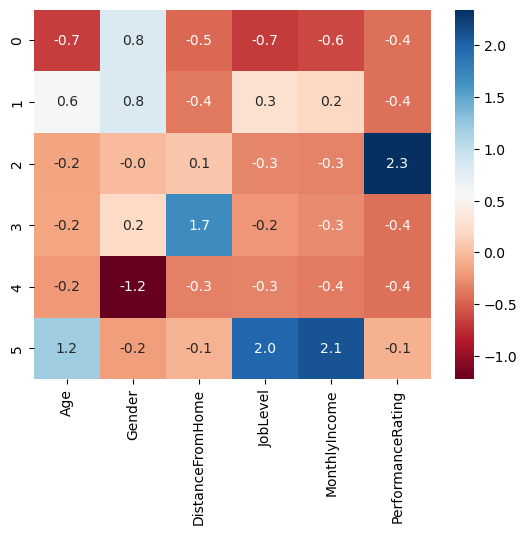

In [55]:
## Create a heatmap for cluster centers

## Plot the cluster cenetrs in an seaborn heatmap
sns.heatmap(
    pd.DataFrame(KM6_v2.cluster_centers_, columns=X_v2.columns),
    cmap='RdBu',
    annot=True,
    fmt='0.1f'
)
plt.show();

### ****Interpretation****
- Cluster 1: Juniors
- Cluster 2: Short distance commuters and low performers
- Cluster 3: High Performing juniors
- Cluser 4: Long distance commuters
- Cluster 5: Females
- Cluster 6: Seniors with High Income

## **5. Fit a PCA model with 2 components (Round - 2)**

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit_transform(X_sd_v2)

array([[ 0.17673577, -0.48214951],
       [ 0.32971075,  1.30767906],
       [-1.20334591, -1.11375929],
       ...,
       [-0.66881675,  0.92154853],
       [ 0.41549127, -1.09093194],
       [-0.49342174, -0.67652647]], shape=(1470, 2))

In [57]:
pd.DataFrame(pca.components_,columns=X_v2.columns)

,Age,Gender,DistanceFromHome,JobLevel,MonthlyIncome,PerformanceRating
0,0.471253,-0.045889,-0.006317,0.623962,0.621419,-0.016871
1,0.030940,-0.350380,0.622951,-0.004861,-0.019161,0.698440


In [58]:
pca.explained_variance_ratio_

array([0.3891213, 0.1719723])

In [59]:
## View the columns
pd.DataFrame(pca.transform(X_sd_v2))

,0,1
0,0.176736,-0.482150
1,0.329711,1.307679
2,-1.203346,-1.113759
3,-1.208728,-0.338567
4,-1.537428,-1.153250
...,...,...
1465,-0.643934,0.490740
1466,1.067724,-0.840463
1467,-0.668817,0.921549
1468,0.415491,-1.090932


In [60]:
## Plot the students with PC1 and PC2
X_transformed_v2 = pd.DataFrame(pca.transform(X_sd_v2), columns=['PC1','PC2'])
X_transformed_v2

,PC1,PC2
0,0.176736,-0.482150
1,0.329711,1.307679
2,-1.203346,-1.113759
3,-1.208728,-0.338567
4,-1.537428,-1.153250
...,...,...
1465,-0.643934,0.490740
1466,1.067724,-0.840463
1467,-0.668817,0.921549
1468,0.415491,-1.090932


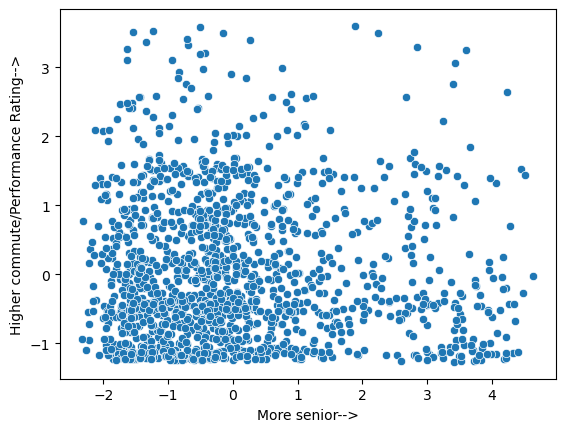

In [61]:
sns.scatterplot(
            X_transformed_v2,
            x='PC1',
            y='PC2',
)
plt.xlabel('More senior-->')
plt.ylabel('Higher commute/Performance Rating-->')
plt.show();

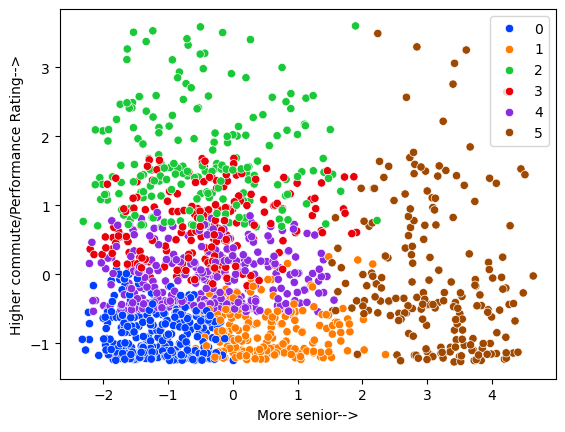

In [62]:
## Overlay the KMeans clusters to visualize
sns.scatterplot(
    data=X_transformed_v2,
    x='PC1',
    y='PC2',
    hue=KM6_v2.labels_,
    palette='bright'
)
plt.xlabel('More senior-->')
plt.ylabel('Higher commute/Performance Rating-->')
plt.show();

In [78]:
## PCA with 3 components
pca_2 = PCA(n_components=3)
X_transformed_v3 = pd.DataFrame(pca_2.fit_transform(X_sd_v2),columns=['PC1','PC2','PC3'])

In [74]:
pca_2.components_

array([[ 4.71253183e-01, -4.58891041e-02, -6.31697223e-03,
         6.23962122e-01,  6.21418823e-01, -1.68713108e-02],
       [ 3.09401817e-02, -3.50379946e-01,  6.22950778e-01,
        -4.86132810e-03, -1.91613746e-02,  6.98439787e-01],
       [ 6.38702703e-03,  8.70346788e-01,  4.90284695e-01,
         3.44877852e-02,  2.97854703e-02,  9.96493270e-05]])

In [75]:
pca_2.explained_variance_ratio_

array([0.3891213 , 0.1719723 , 0.16600631])

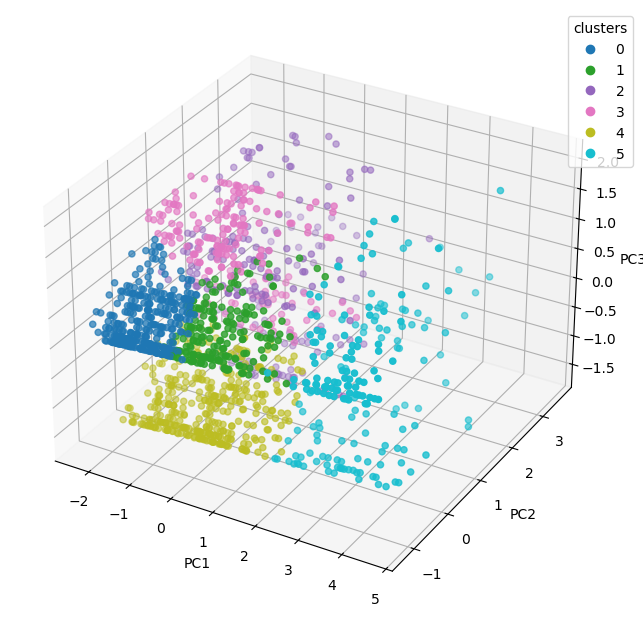

In [79]:
## 3D plotting of the clusters
# import plotting libraries
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(KM6_v2.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([X_transformed_v3, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['PC1'], df_clean['PC2'], df_clean['PC3'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

## **6. EDA of Clusters**

In [63]:
cluster_df = pd.Series(KM6_v2.labels_,name='Clusters')

In [64]:
employee_clusters = pd.concat([employee,cluster_df],axis=1)

In [66]:
cluster_map = {
    0:'Juniors',
    1:'Short distance commuters and low performers',
    2:'High Performing juniors',
    3:'Long distance commuters',
    4:'Females',
    5:'Seniors with High Income'
}

employee_clusters['Clusters'] = employee_clusters['Clusters'].map(cluster_map)

In [67]:
employee_clusters.head()

,EmployeeID,Age,Gender,DistanceFromHome,JobLevel,Department,MonthlyIncome,PerformanceRating,JobSatisfaction,Attrition,Clusters
0,1001,41,Female,1,2,Sales,5993,3,4,Yes,Females
1,1002,49,Male,8,2,Research & Development,5130,4,2,No,High Performing juniors
2,1004,37,Male,2,1,Research & Development,2090,3,3,Yes,Juniors
3,1005,33,Female,3,1,Research & Development,2909,3,3,No,Females
4,1007,27,Male,2,1,Research & Development,3468,3,2,No,Juniors


In [88]:
pd.DataFrame(employee_clusters['Clusters'].value_counts())

,count
Clusters,
Females,351
Juniors,320
Long distance commuters,202
High Performing juniors,201
Short distance commuters and low performers,200
Seniors with High Income,196


In [89]:
employee_clusters['Attrition'] = np.where(employee_clusters['Attrition']=='Yes',1,0)

In [90]:
pd.DataFrame(
    employee_clusters
        .groupby(['Clusters'])['Attrition']
        .mean()
        .sort_values(ascending=False)
)

,Attrition
Clusters,
Females,0.0
High Performing juniors,0.0
Juniors,0.0
Long distance commuters,0.0
Seniors with High Income,0.0
Short distance commuters and low performers,0.0


In [91]:
##Group by cluster and department
pd.DataFrame(
    employee_clusters.groupby(['Clusters','Department'])['Attrition']
        .mean()
        .sort_values(ascending=False)
)

Attrition
Clusters                                    Department                       
Females                                     Human Resources               0.0
                                            Research & Development        0.0
Short distance commuters and low performers Research & Development        0.0
                                            Human Resources               0.0
Seniors with High Income                    Sales                         0.0
                                            Research & Development        0.0
                                            Human Resources               0.0
Long distance commuters                     Sales                         0.0
                                            Research & Development        0.0
                                            Human Resources               0.0
Juniors                                     Sales                         0.0
                                            Research & Development        0.0
                                            Human Resources               0.0
High Performing juniors                     Sales                         0.0
                                            Research & Development        0.0
                                            Human Resources               0.0
Females                                     Sales                         0.0
Short distance commuters and low performers Sales                         0.0